# SciPy

SciPy stands for scientific python. It is a scientific computation library that provides more utility functions for optimization, statistics and signal processing. We will primarily look at three of utilities, namely, equation solving, curve fitting and solving ordinary differential equations. <br><br>

## Equation Solver
We can use the `root` function of the `scipy.optimize` module to get the roots of an equation.

In [1]:
from scipy.optimize import root
import numpy as np

Suppose we need to solve an equation $f(x)=0$. We define the equation in terms of a function which takes the variable to be determined, ie $x$, as an input and returns the value of the function, ie $y=f(x)$ as an output. Consider a trivial example: we need to determine the roots of $x-2=0$.

In [2]:
#First we define the function
def f(x):
    return x-2

val=root(f,0) #We also need to provide an initial guess for the root, here 0
print(val.x)

[2.]


Consider a non trivial case, we need to solve the equation $x-3sin(x)=0$ which can have multiple roots.

In [3]:
def f(x):
    return x-3*np.sin(x)

#The equation will have 3 roots so 3 initial guesses need to be provided
val=root(f,[-2,0,3])
print(val.x)

[-2.27886266  0.          2.27886266]


You may also solve a set of linear equations, consider the example:
$$4x-5y+8=0$$
$$3x+2y-17=0$$

In [4]:
def f(x):
    return [4*x[0]-5*x[1]+8, 3*x[0]+2*x[1]-17]
val=root(f,[0,0])
print(val.x) #returns the array x, ie [x,y] of the equations

[3. 4.]


As you would have seen above, the function `root` requires a rough idea about the location of the roots and their number so as to make the initial guesses. Thus to work with a complicated equation it would be better to plot the equation and get a rough idea from there.<br><br>
## Curve Fitting
Many a times it so happens that a theorist devises a new theory (read equation) of some physical phenomenon. Now, the theorist has to wait for an experimentalist to perform some sorcery and get some meaningful data. Let's say the data obtained were some values of the equation (ie formula) corresponding to the values of the independent variable. Using this dataset one can try to 'fit' the theoretical model (read equation) and obtain the values of the paramters governing the equation. This procedure is known as curve fitting. We utilize the `curve_fit` function of the `scipy.optimize` module to do so.

In [5]:
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

First the theorist defines the model. For ease, let's consider a linear model.

In [6]:
#x is the independent variable, m & c are the parameters to be determined
def f(x,m,c):
    return m*x+c        

Since, I (Saad) am not an experimentalist, I do not have any dataset. So I'll just go on and create my own synthetic dataset which would imitate some stupid experiment which gives values within some error range.

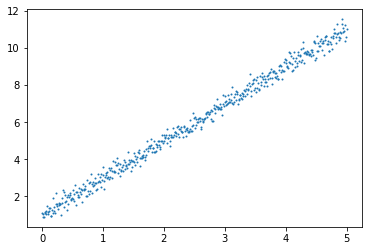

In [7]:
xdata=np.linspace(0,5,500)
ydata=f(xdata,2,1)+0.25*np.random.randn(len(xdata)) #Note down m=2 and c=1, we will tally our results at the end. Also, the random term adds the error in the values

#Let's have a look at our data
plt.scatter(xdata,ydata,s=1)

So the above really looks to come from an experiment. Now let's try to determine the parameters $m$ and $c$.

In [8]:
p_opt, p_cov = cf(f,xdata,ydata)
#p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.
#Since the function f(x,m,c) had parameters in the order (m,c), p_opt is also in the form (m,c)
print(p_opt)

[2.00020366 0.99005182]


Viola! We obtain the best-fit parameters to be $(m,c)=(2.00371583,0.99559783)$ which is quite close to the value $(2,1)$ which we had earlier used to produce the dataset and then introduced some error. Let's plot the result.

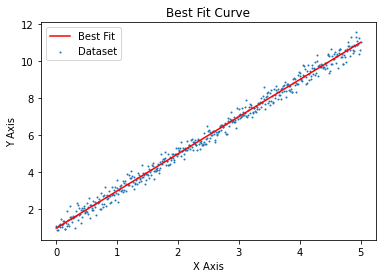

In [9]:
plt.scatter(xdata,ydata,s=1, label='Dataset')
plt.plot(xdata,f(xdata,*p_opt),'r',label='Best Fit')
# * before a separable object unpacks it. So you don't need to write lin_func(xdata,p_opt[0],p_opt[1])
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title('Best Fit Curve')
plt.legend()
plt.show()

Let's try a non trivial example. Suppose you have the model $ax^3+bx^2+cx+d=0$ and you need to determine $(a,b,c,d)$.

[ 1.00137382  2.00111546 -3.00392464 -1.99850826]


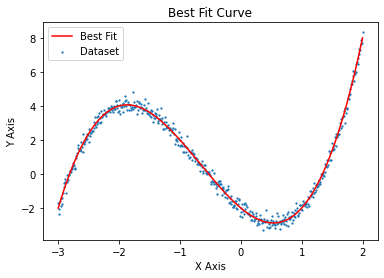

In [10]:
#Define the model
def f(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

#Let's generate some dataset
xdata=np.linspace(-3,2,500)
ydata=f(xdata,1,2,-3,-2)+0.25*np.random.randn(len(xdata)) #We've given (a,b,c,d)=(1,2,-3,-2)

#Obtain the best fit parameters
p_opt, p_cov = cf(f,xdata,ydata)
print(p_opt)

#Plot the best fit curve
plt.scatter(xdata,ydata,s=1.5,label='Dataset')
plt.plot(xdata,f(xdata,*p_opt),'r',label='Best Fit')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title('Best Fit Curve')
plt.legend()
plt.show()

## Ordinary Differential Equation Solver
It is common in physics to see a theoretical model being described through a set of differential equations. A differential equation contains in a way the general information about the system. On solving the equations along with the initial or boundary conditions a thorough picture of the system can be obtained. For example, Newton's laws of motion are a set of differential equations governing the motion of the system through time, or in other words, the time derivatives alongwith initial conditions determine the time evolution of the system. It is therefore necessary to be able to solve the differential equations and here, we do so computationally. We use the `solve_ivp` function of the `scipy.integrate` module to perform the task.

In [11]:
from scipy.integrate import solve_ivp

We shall consider two cases: 1st order ODEs and higher order ODEs which can be broken into a set of 1st order ODEs

### First Order ODEs
Consider an example of a 1st order ODE: $$\frac{dx}{dt}=a-bt$$ where $a, b$ are some parameters. As you can see this is the equation of motion of an object thrown in gravity. The resulting solution must be a parabola. Let's see if we obtain one. Suppose the parameters values are $a=8$ and $b=2$.

In [12]:
#Define the function first which returns the derivative
def deri(t,x,a,b):
    return a-b*t #Returns the derivative because a-bt=dx/dt

As mentioned earlier an ODE represents a family of solutions and to pick up a specific solution we need some conditions. A Nth order ODE would require N conditions. Here we have N=1 so we provide the initial condition (also known as Initial Value Problem), ie let $x=5$ at $t=0$.

In [13]:
#Initial condition denoted as x0
x0=np.array([5])

Since we are solving the equation numerically, we need instants of the independent variable (here $t$) at which we want to determine the dependent variable (here $x$).

In [14]:
#Define a certain range of t over which we want to calculate x
t0=0
tf=10
t_span=(t0,tf)
t=np.linspace(t0,tf,1000) #Obtained a set of points at which we calculate x

Let's set the values of the parameters

In [15]:
a=8
b=2

Now comes the solving part

In [16]:
soln=solve_ivp(deri, t_span, x0, t_eval=t, args=(a,b))
#Uncomment the command below to see what this object soln holds
#print(soln)

We are interested in getting the solution, ie values of $x$. Since we provided 1000 values of $t$, we must get 1000 values of $x$. The solution can be obtained as:

In [17]:
#print(soln.y)
print(soln.y.shape) #Gives (1,1000) that is 1st order ODE evaluated at 1000 points

(1, 1000)


In [18]:
#The solution x is now
x=soln.y[0] #We will see the significance of [0] in the 2nd case
t_points=soln.t #Same as the t above

Let us see how the solution looks

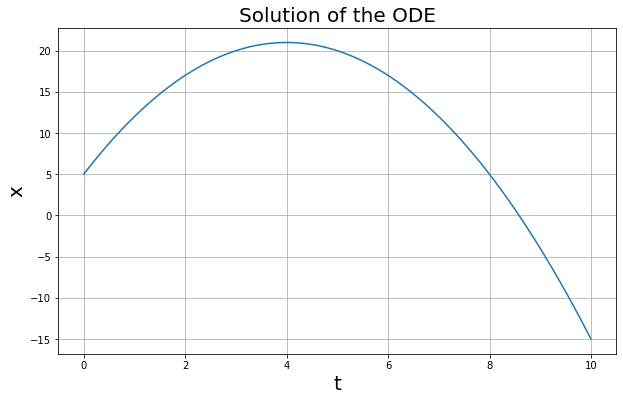

In [19]:
plt.figure(figsize=(10,6))
plt.plot(t_points, x)
plt.xlabel('t',size=20)
plt.ylabel('x',size=20)
plt.title('Solution of the ODE',size=20)
plt.grid()
plt.show()

That indeed is a parabola! Let's now move on to higher order ODEs and consequently family of ODEs.
### Higher Order ODEs and Family of ODEs
We cannot solve higher order ODEs using `solve_ivp`. So to tackle this, we break the Nth order ODE into N 1st order ODEs thus creating a family of ODEs. Consider the example of a LCR circuit. Using Kirchoff's law we get the equation: <br> <br>$$L\frac{d^2Q}{dt^2}+R\frac{dQ}{dt}+\frac{Q}{C}=V$$ <br>which is a 2nd order ODE. As you would be aware there are three cases: underdamped, overdamped and critically damped. We will not get into the details and simply take the parameters values for the underdamped case. This 2nd order ODE can be broken by substituting $I=\frac{dQ}{dt}$, doing so we get the family of two ODEs: $$\frac{dQ}{dt}=I$$ <br>$$\frac{dI}{dt}=-\frac{R}{L}I-\frac{Q}{LC}+\frac{V}{L}$$. <br>To draw similarity to the previous case, we define the vector $X=(Q,I)$ (called the state of the system) and the ODE takes the form <br> <br>$$\frac{dX}{dt}=f(X)$$. 

In [20]:
#Define the derivative function
def deri(t, state, R, L, C, V):
    Q=state[0] #State=[Q,I]
    I=state[1]
    return [I, -(R*I)/L-Q/(L*C)+V/L] #Function returns [dQ/dt, dI/dt]

In [21]:
#Define the time span and the time instants
t0=0
tf=200
t_span=(t0,tf)
t=np.linspace(t0,tf,1000)

In [22]:
#Define the initial conditions
cond=np.array([0,1]) #We had a 2nd order ODE so two initial conditions: Q(0) and I(0)

In [23]:
#Set the parameter values
R=1
L=16
C=1
V=5

In [24]:
#Lets solve the equation now
soln=solve_ivp(deri, t_span, cond, t_eval=t, args=(R,L,C,V))

In [25]:
#Obtain the solution
state=soln.y
print(state.shape) #(2,1000) because now we have two 1st order ODEs evaluated at 1000 points

(2, 1000)


Let's visualize the solution we have obtained

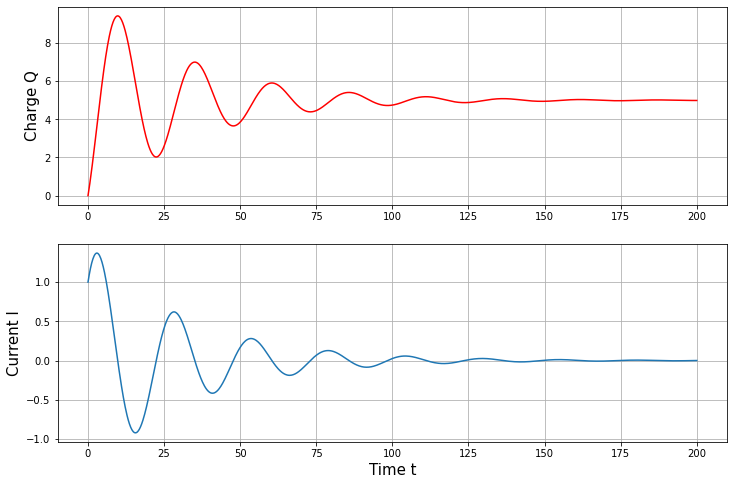

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t,state[0], 'r')
plt.grid()
plt.ylabel('Charge Q',size=15)
plt.subplot(212)
plt.plot(t,state[1])
plt.grid()
plt.ylabel('Current I',size=15)
plt.xlabel('Time t',size=15)
plt.show()